### In this Jupyter Notebook we will explore the various relationships in Google Playstore dataset
### using numpy, pandas, seaborn, matlibplot and more.

In [2]:
# import relavent packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load in the csv file with pd.read_csv()

In [3]:
google = pd.read_csv("googleplaystore.csv")
google_user = pd.read_csv("googleplaystore_user_reviews.csv")


Inspect the data with pd.head()

In [4]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Use pd.info() to inspect data types as non-null counts 

In [6]:
google.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
google_user.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Checking the missing data which can help to make a decision on how to deal with them.

In [8]:
google.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

Select 5 random rows with missing data to inspect

In [9]:
google[google.isnull().any(axis=1)].sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6800,BT (Usage Interne),LIBRARIES_AND_DEMO,NaN,3,19M,100+,Free,0,Everyone,Libraries & Demo,"August 17, 2017",1.1,2.3 and up
9514,Ek IRA,COMMUNICATION,NaN,0,5.7M,10+,Free,0,Everyone,Communication,"July 27, 2018",0.3.1,4.1 and up
4256,The J-Notes: Jazz News,SPORTS,NaN,7,7.2M,"1,000+",Free,0,Everyone 10+,Sports,"February 28, 2018",5.2.2,4.1 and up
9928,EU Whoiswho,BUSINESS,NaN,0,2.7M,10+,Free,0,Everyone,Business,"December 1, 2016",0.0.1,4.0 and up
5753,AW,FAMILY,NaN,0,Varies with device,5+,Free,0,Everyone 10+,Strategy,"August 28, 2015",Varies with device,Varies with device


Upon inspection columns contain null values are: "Current Ver", "Android Ver", "Content Rating", "Type" and "Rating"
Out of above columns "Current Ver", "Android Ver", "Content Rating" and "Type" have few rows with missing value therefore we can safely drop
the corresponding row without impacting the end result. 
However vast majority of the missing data are in the "Rating" column so by simply dropping the missing row will affect the end result 
not to mention the potential relationship between "Rating" and other variables. 

In [10]:
# drop all rows contains missing value except for NaN in "Rating" column
google = google.dropna(subset=["Type", "Current Ver", "Android Ver", "Content Rating"])
print(google.isnull().sum())

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


Exploring the viability of imputing the missing "Rating" values through "Category" means

In [11]:
google.groupby("Category")["Rating"].mean(numeric_only=True)

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

Above shows there is a small but significant variance between each "Category" so Impute missing values in "Rating" by "Category" averages
seems to be more accurate than just using the overall average.

In [12]:
# google.groupby("Category")["Rating"].transform("mean") will form a Series containing mean for each category in the shape as the google
# then google["Rating"].fillna() fill in the NaN with the corresponding mean value
google["Rating"] = google["Rating"].fillna(google.groupby("Category")["Rating"].transform("mean"))
google["Rating"] = google["Rating"].round(2)
google.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
166,Read books online,BOOKS_AND_REFERENCE,4.10,91615,23M,"5,000,000+",Free,0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
2224,Learn to Read with Tommy Turtle,FAMILY,4.00,20763,Varies with device,"5,000,000+",Free,0,Everyone,Educational;Education,"March 6, 2018",3.6.17,2.3 and up
5204,Lyra Virtual Assistant,PRODUCTIVITY,4.50,41624,3.4M,"1,000,000+",Free,0,Everyone,Productivity,"May 24, 2018",1.2.4,4.0.3 and up
5177,AH of Rocky Hill,MEDICAL,4.19,0,29M,100+,Free,0,Everyone,Medical,"November 24, 2017",300000.0.93,4.0.3 and up
3955,Cardi B Piano Game,GAME,3.10,50,7.4M,"10,000+",Free,0,Everyone,Music,"November 15, 2017",2.0,4.0 and up


In [13]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Now we need change the data type to a more suitable format such as "Reviews" having dtype of "object" instead of "int".

In [14]:
# "Reviews" to int type
google["Reviews"] = google["Reviews"].astype("int")
# remove "$" from "Price" and set it as float type
google["Price"] = google["Price"].str.replace("$", "").astype("float")
# set "Last Update" as datetime
google["Last Updated"] = pd.to_datetime(google["Last Updated"])
# remove "+" and "," from "Installs" and set it as int type
google["Installs"] = google["Installs"].str.replace("[+,]", "", regex=True).astype(int)
google.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6185,ePay.bg,FINANCE,4.40,2017,2.4M,100000,Free,0.00,Everyone,Finance,2018-07-26,2.22,4.1 and up
4316,Anna.K Tarot,FAMILY,4.80,17,23M,100,Paid,3.99,Mature 17+,Entertainment,2017-01-16,1.4.4,4.0.3 and up
2058,Baby Tiger Care - My Cute Virtual Pet Friend,FAMILY,4.50,432,63M,100000,Free,0.00,Everyone 10+,Educational;Education,2018-07-27,1.0.89,4.4 and up
5812,AX Watch for WatchMaker,PERSONALIZATION,4.34,2,238k,1,Paid,0.99,Everyone,Personalization,2017-08-18,1.0,2.3 and up
8529,Turbo Downloader,TOOLS,3.90,23348,3.2M,5000000,Free,0.00,Everyone,Tools,2018-07-04,3.48,4.0.3 and up


Now to check for duplicate

In [15]:
pd.value_counts(google.duplicated())

False    10346
True       483
Name: count, dtype: int64

Remove duplicates

In [16]:
google.drop_duplicates(inplace=True)
pd.value_counts(google.duplicated())

False    10346
Name: count, dtype: int64

Now to clean google_user dataset

In [17]:
#remove duplicates
google_user.drop_duplicates(inplace=True)

#remove missing values since they cannot be meaningfully imputed
google_user.dropna(inplace=True)

google_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


Summary statistics for google

In [18]:
google.describe()

,Rating,Reviews,Installs,Price,Last Updated
count,10346.000000,1.034600e+04,1.034600e+04,10346.000000,10346
mean,4.187172,4.063338e+05,1.417266e+07,1.031561,2017-11-14 14:51:45.200077312
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.050000,3.200000e+01,1.000000e+03,0.000000,2017-09-04 06:00:00
50%,4.260000,1.688500e+03,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.659825e+04,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.485385,2.698179e+06,8.028090e+07,16.287252,NaN


Below is a heatmap showing correlation between all the numerical variables

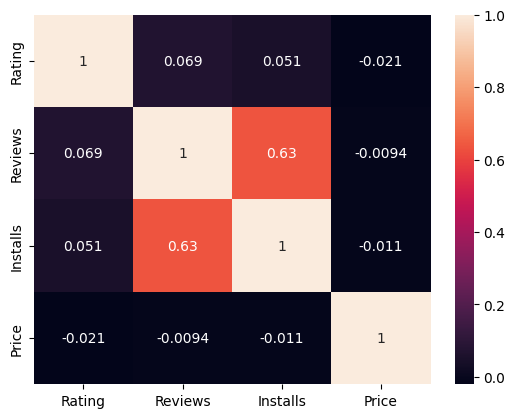

In [19]:
sns.heatmap(google.corr(method="pearson", numeric_only=True), annot=True)
plt.show()


Interesting observation that "Reviews" and "Installs" have correlation of 0.63.
We shall investigate further.

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


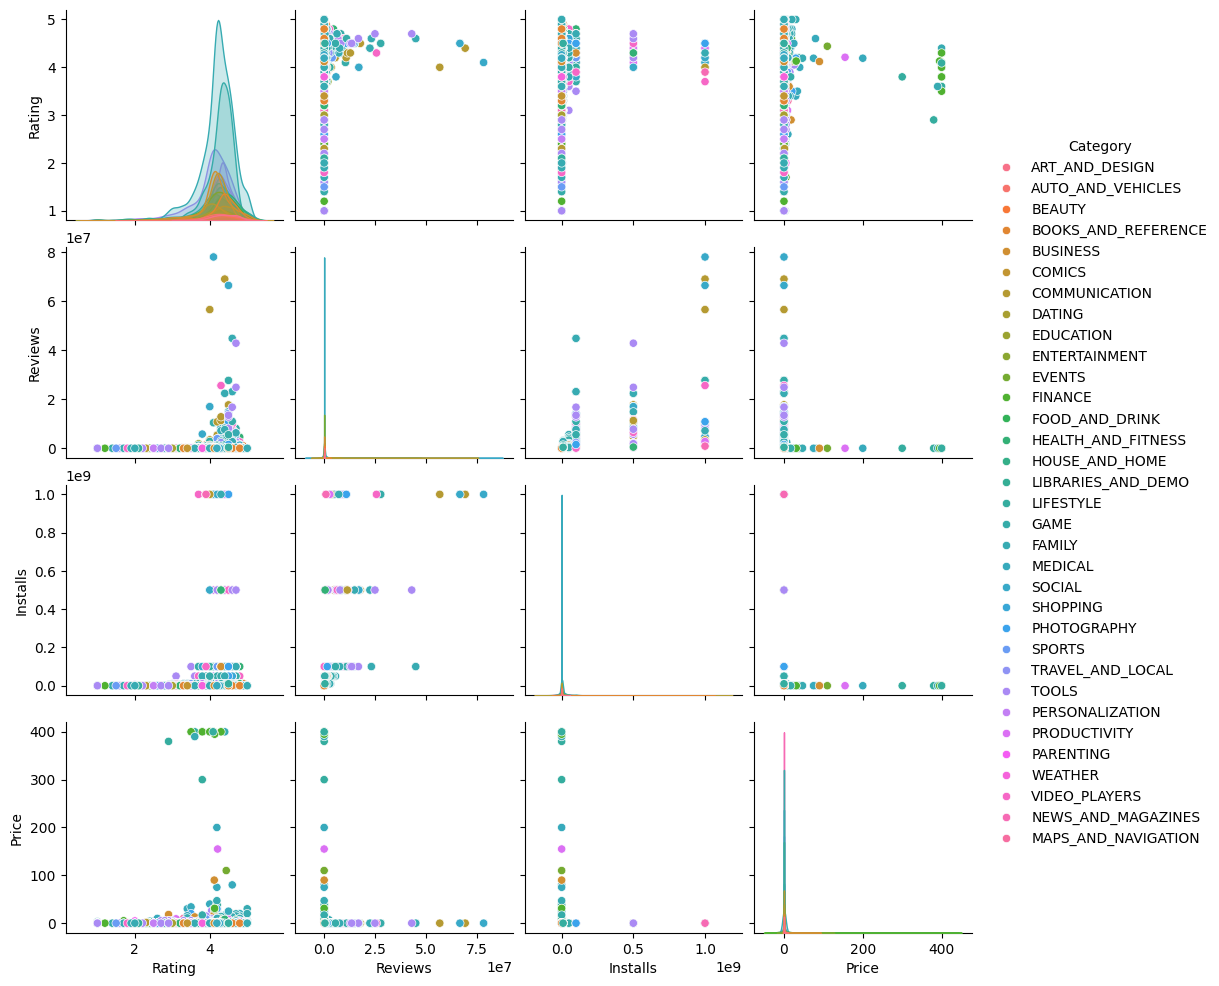

In [20]:
# Pairplot to explore relationships between variables
sns.pairplot(google, hue="Category")
plt.show()

Pair plot can be useful to glean general info about a datase but for graph such as "Reviews" vs "Installs" we need change the scale so it can become more meaningful

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


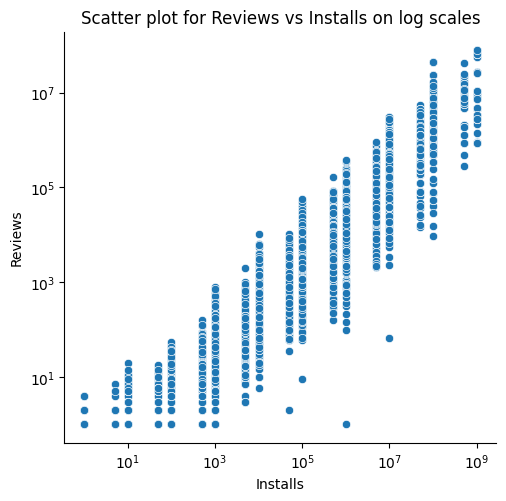

In [21]:
ax = sns.relplot(y=google["Reviews"], x=google["Installs"])
plt.title("Scatter plot for Reviews vs Installs on log scales")
plt.xscale("log")
plt.yscale("log")

Text(0.5, 1.0, 'Distribution of Rating')

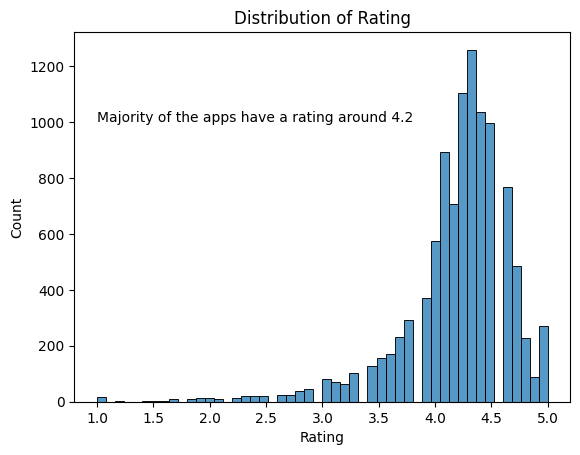

In [22]:
ax = sns.histplot(google["Rating"], bins=50)
ax.text(1, 1000, "Majority of the apps have a rating around 4.2")
plt.title("Distribution of Rating")

Below is a horizontal countplot showing number of apps per category

Text(0.5, 0, 'Count')

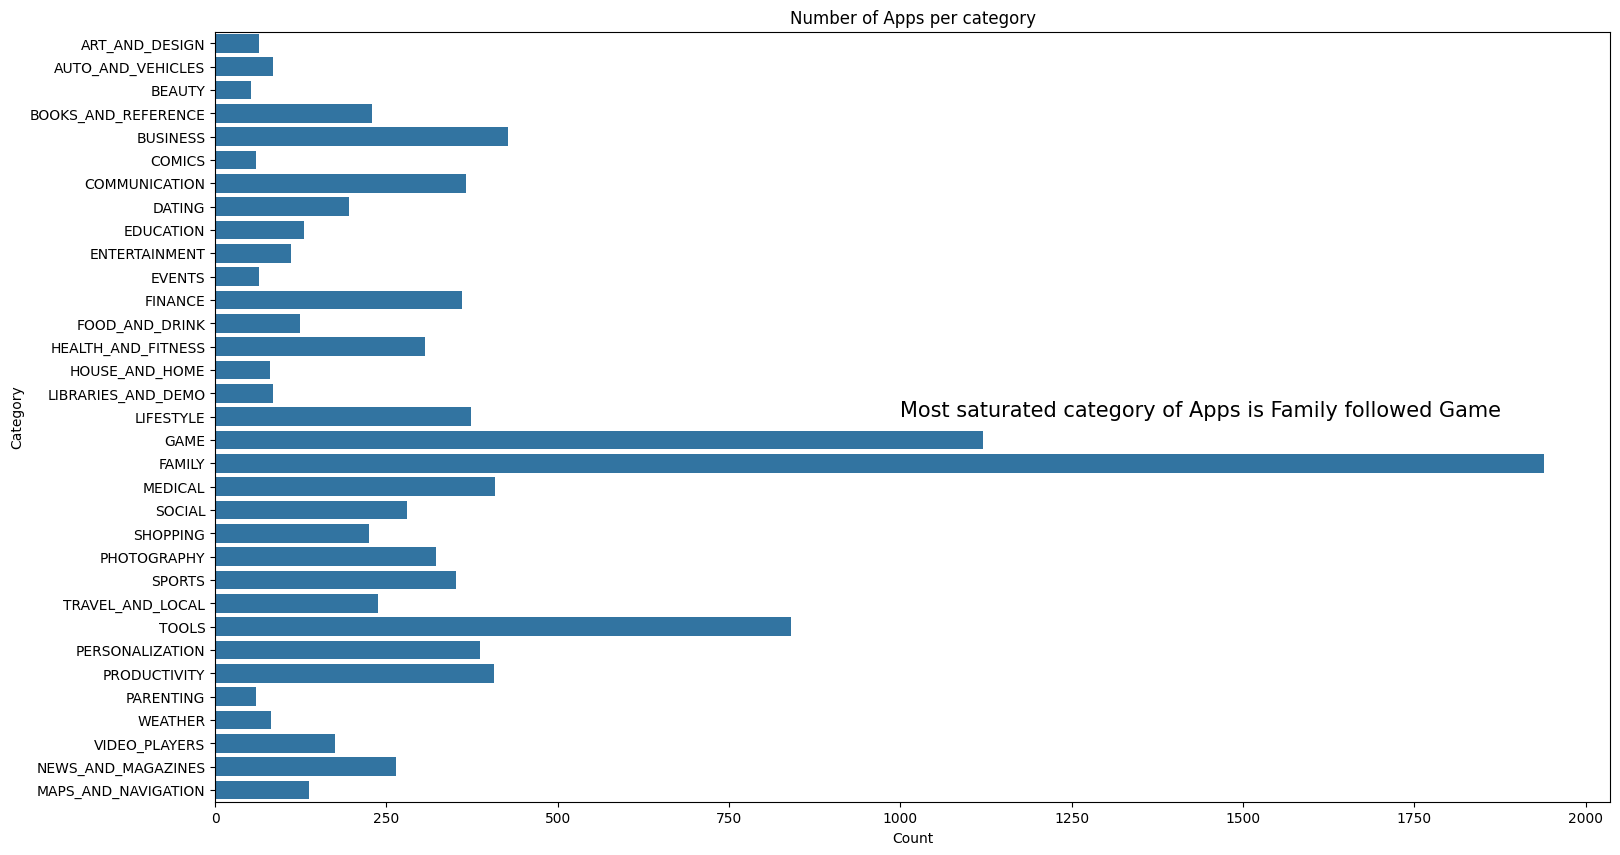

In [23]:
plt.figure(figsize=(18,10))
ax = sns.countplot(y="Category", data=google)
plt.title("Number of Apps per category")
ax.text(1000, 16, "Most saturated category of Apps is Family followed Game", fontsize= 15)
plt.xlabel("Count")


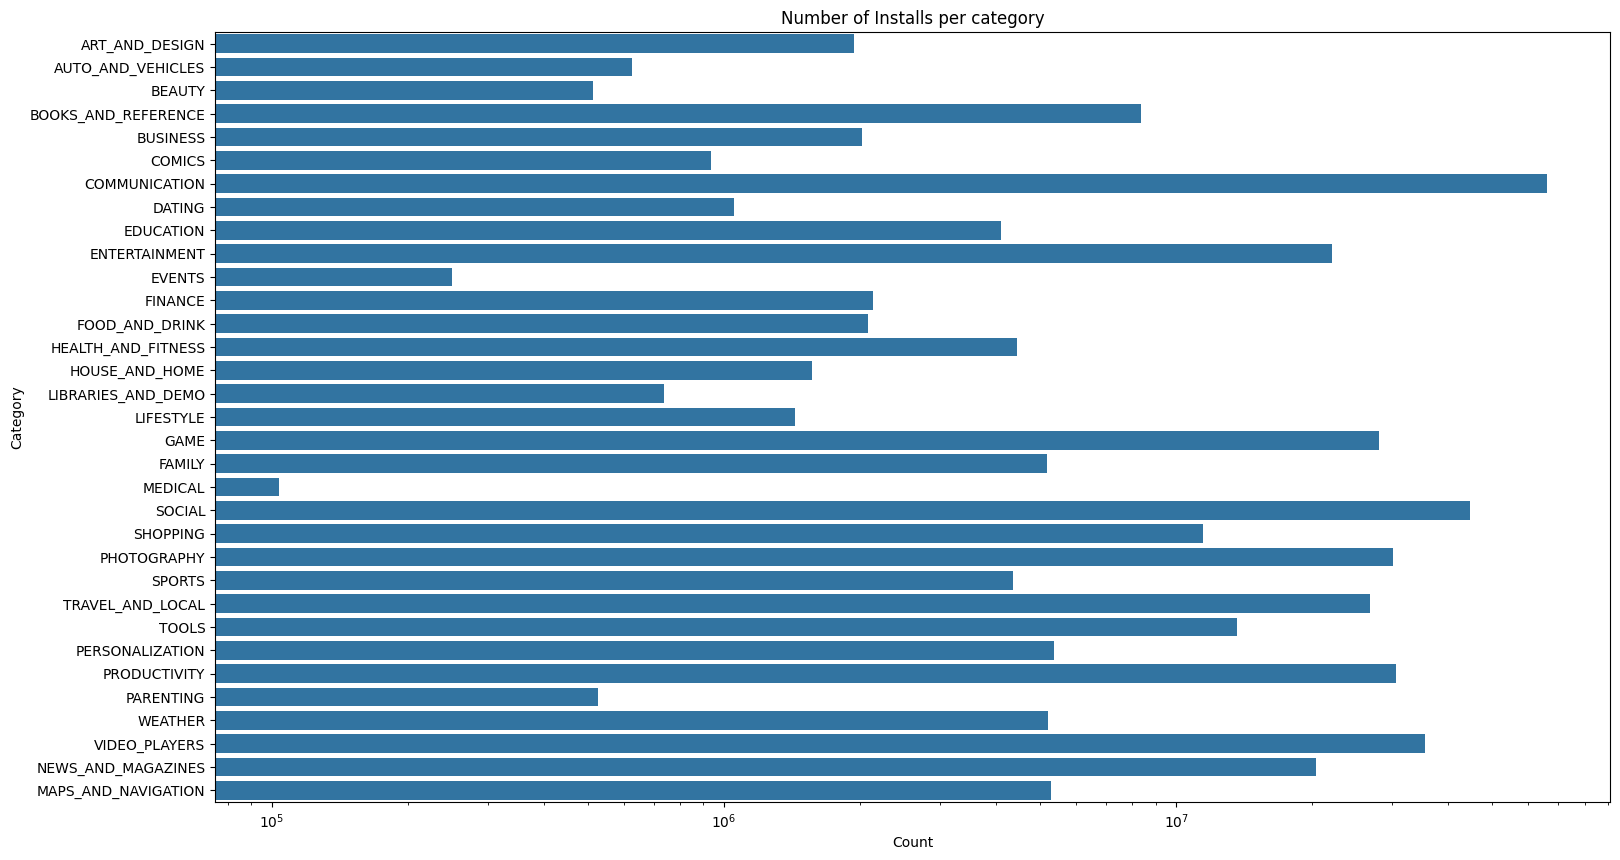

In [24]:
plt.figure(figsize=(18,10))
ax = sns.barplot(y='Category', x="Installs",errorbar=None, data=google)
plt.title("Number of Installs per category")
plt.xlabel("Count")
plt.xscale("log")
plt.show()

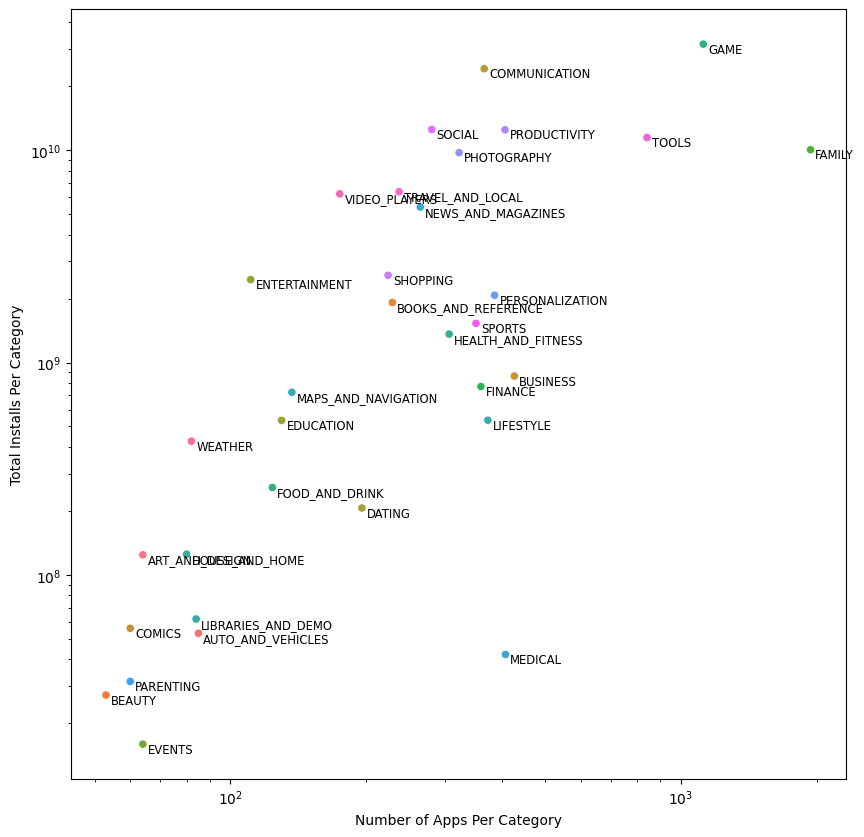

In [25]:
# Create a new DataFrame to plot Installs per category vs number of apps per category
category_total = google.groupby("Category").count()
installs_total = google.groupby("Category")["Installs"].sum().reset_index(name="Total Installs")
merged_installs_count = pd.merge(category_total, installs_total, on="Category")
merged_installs_count.head()
plt.figure(figsize=(10, 10))
sns.scatterplot(data=merged_installs_count, x="App", y="Total Installs", hue="Category", legend=False)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of Apps Per Category")
plt.ylabel("Total Installs Per Category")
# Annotate each point with it's category
for index, row in merged_installs_count.iterrows():
    plt.text(row['App']*1.025, row['Total Installs']*0.91, row['Category'], horizontalalignment='left', size='small', color='black')

The above scatter shows a postive relationship between total installs per category and number of apps in that category.

To improve the accessibility of scatter plot between Reviews and Rating 
I've constructed a interactive version using plotly

In [26]:
import plotly.express as px

fig = px.scatter(google, x="Rating", y="Reviews", color="Category", size="Installs", hover_name="App", size_max=60, log_y=True)
fig.update_layout(title='Interactive Scatter Plot of Apps by Rating, Reviews, and Installs')
fig.show()


Above graph shows a gentle positive trend between Reivews and Rating, onced zoomed in it can be confirmed once again that apps with more installs generally have more reviews.
Interestingly apps with the highest and lowest rating generally have fewer installs perhaps it's due to small sample size.

Visualisations for google.user

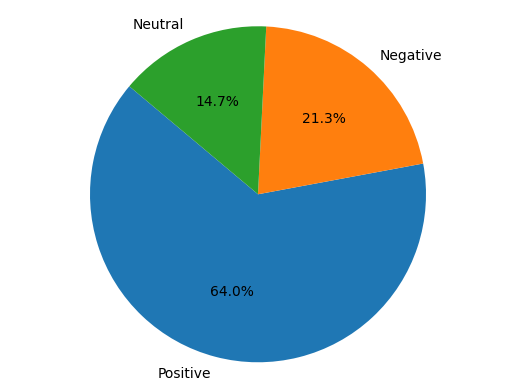

In [27]:
sentiment_counts = google_user["Sentiment"].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%', startangle=140)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Majority of the reviews are positive which matches the finding from the histogram of the google DataFrame



It'll be a good idea to represent the text data from Translated_Review visually.
This can be particularly useful for quickly identifying the overall sentiment of large volume of
text.

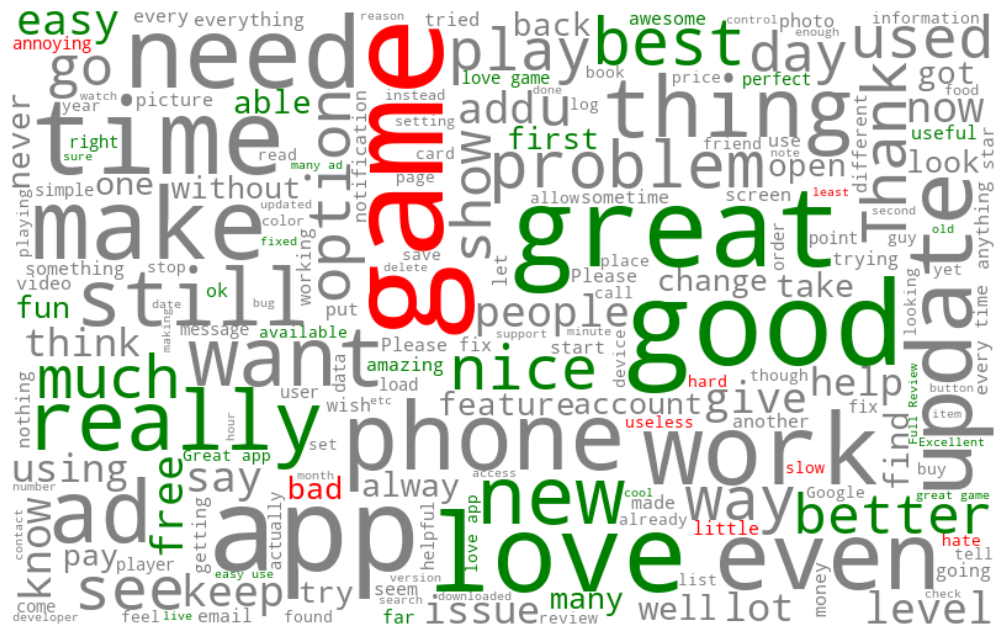

In [28]:
from wordcloud import WordCloud
from textblob import TextBlob

# collect all the words from reviews
all_words = ' '.join([text for text in google_user["Translated_Review"]])

def colour_func(word, *args, **kwargs):
    sentiment = TextBlob(word).sentiment.polarity
    if sentiment > 0:
        return "green"  # Positive sentiment
    elif sentiment < 0:
        return "red"    # Negative sentiment
    else:
        return "grey"   # Neutral sentiment

# call WordCloud object to creat a word cloud from all_words    
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", color_func=colour_func).generate(all_words)

plt.figure(figsize=(15, 8))
# imshow to display word cloud with interpolation="bilinear" to smooth out the image
plt.imshow(wordcloud, interpolation="bilinear")
# remove remove all labels and ticks from the plot 
plt.axis("off")
plt.show()



Combinining two DF together

In [29]:
combined_google = pd.merge(google, google_user, on="App")
combined_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40414 entries, 0 to 40413
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     40414 non-null  object        
 1   Category                40414 non-null  object        
 2   Rating                  40414 non-null  float64       
 3   Reviews                 40414 non-null  int32         
 4   Size                    40414 non-null  object        
 5   Installs                40414 non-null  int32         
 6   Type                    40414 non-null  object        
 7   Price                   40414 non-null  float64       
 8   Content Rating          40414 non-null  object        
 9   Genres                  40414 non-null  object        
 10  Last Updated            40414 non-null  datetime64[ns]
 11  Current Ver             40414 non-null  object        
 12  Android Ver             40414 non-null  object

We'll use heatmap again with correlation matrix for a quick glance at potential relationships.

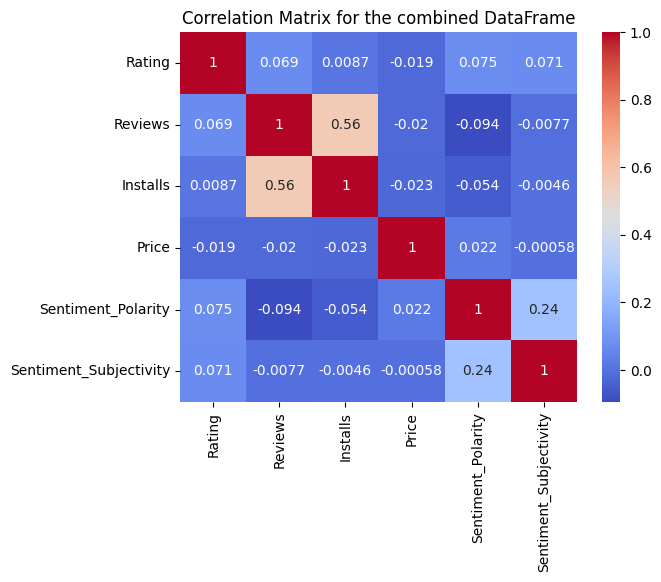

In [30]:
sns.heatmap(combined_google.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for the combined DataFrame")
plt.show()

Convert the "Sentiment" column to a format that's more useful to our analysis

In [31]:
# add a column to represent "Sentiment" in int
combined_google["Sentiment Num"] = combined_google["Sentiment"].replace(to_replace=["Neutral", "Positive", "Negative"], value=[0, 1, -1])
# average Sentiment per App
combined_google["Avg Sen/App"] = combined_google.groupby("App")["Sentiment Num"].transform("mean")
# average Sentiment per Category
combined_google["Avg Sen/Category"] = combined_google.groupby("Category")["Sentiment Num"].transform("mean")



Visualise the average sentiment for each category

Text(0.5, 1.0, 'Average Sentiment per Category')

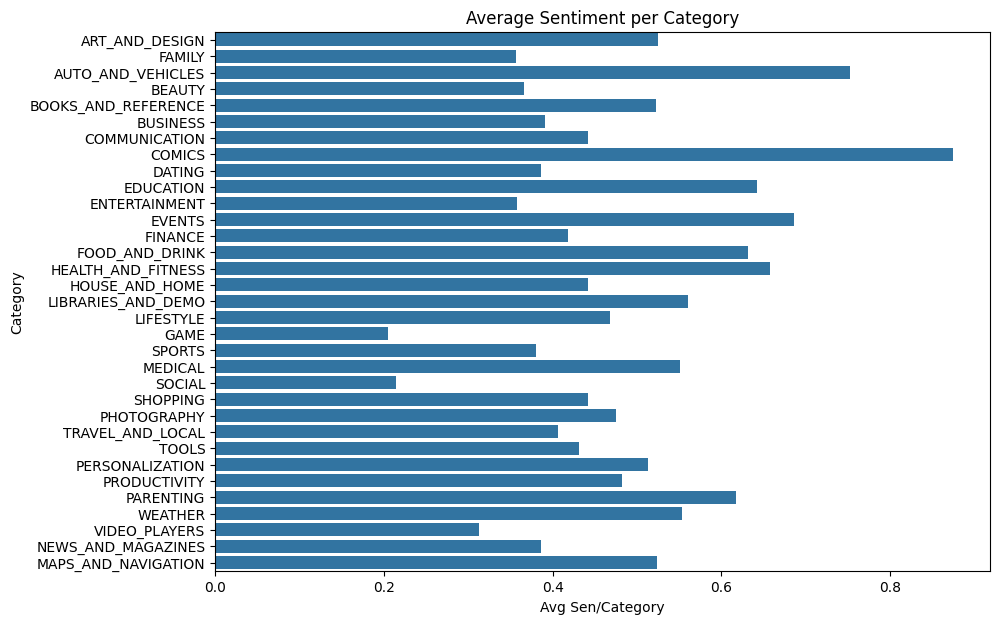

In [32]:
plt.figure(figsize=(10,7))
sns.barplot(x=combined_google["Avg Sen/Category"], y=combined_google["Category"])
plt.title("Average Sentiment per Category")

Interesting to note, the two categories("Auto and Vehicles" and "Comics") with the most postive sentiment also have the lowest number of apps available.

Let's now find out what's the Best and Worst App per category based on user sentiment.

Text(0.5, 1.0, 'Best App Based on Sentiment For Each Category')

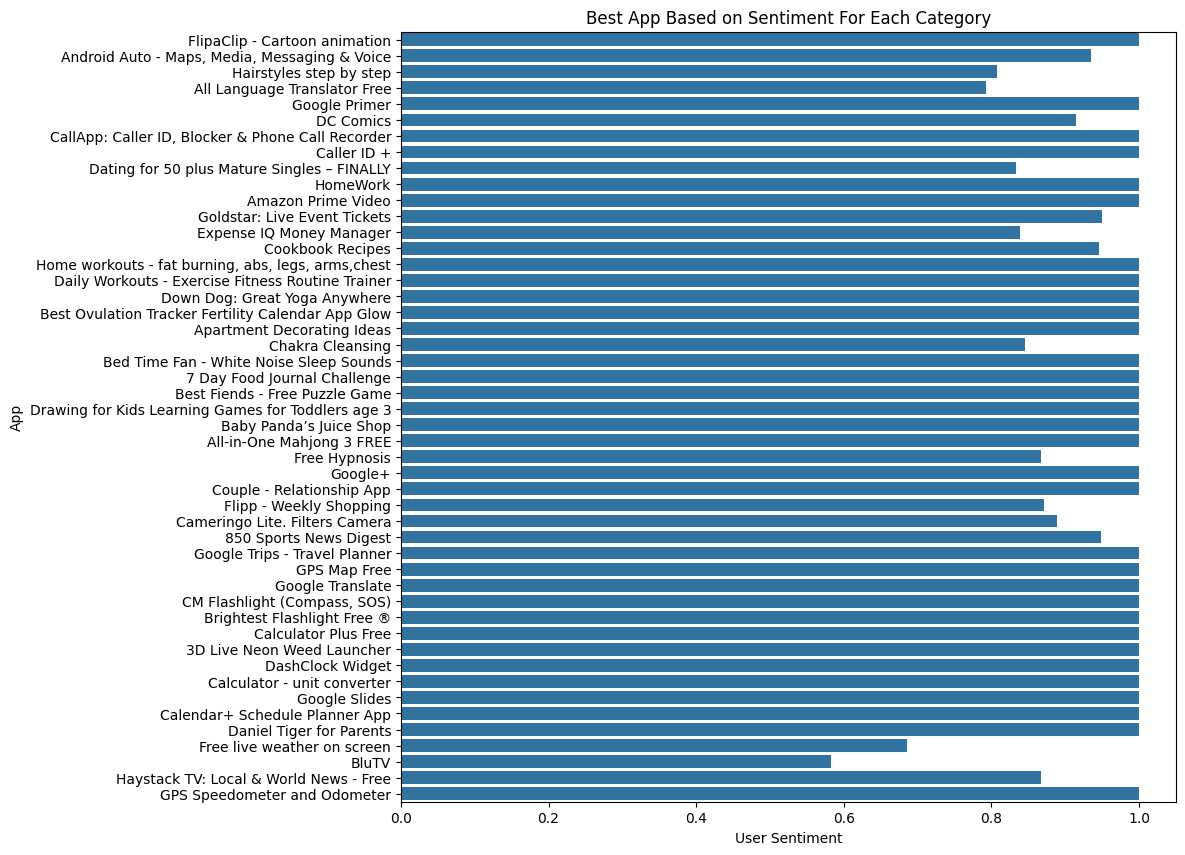

In [33]:
# Calculate the maximum "Avg Sen/App" value for each category
max_values = combined_google.groupby("Category")["Avg Sen/App"].transform("max")

# Filter the DataFrame to only include rows where "Avg Sen/App" equals the category's max value
best_performance_per_category = combined_google[combined_google["Avg Sen/App"] == max_values]

plt.figure(figsize=(10,10))
sns.barplot(x="Avg Sen/App", y="App", data=best_performance_per_category)
plt.xlabel("User Sentiment")
plt.title("Best App Based on Sentiment For Each Category")

Text(0.5, 1.0, 'Worst App Based on Sentiment For Each Category')

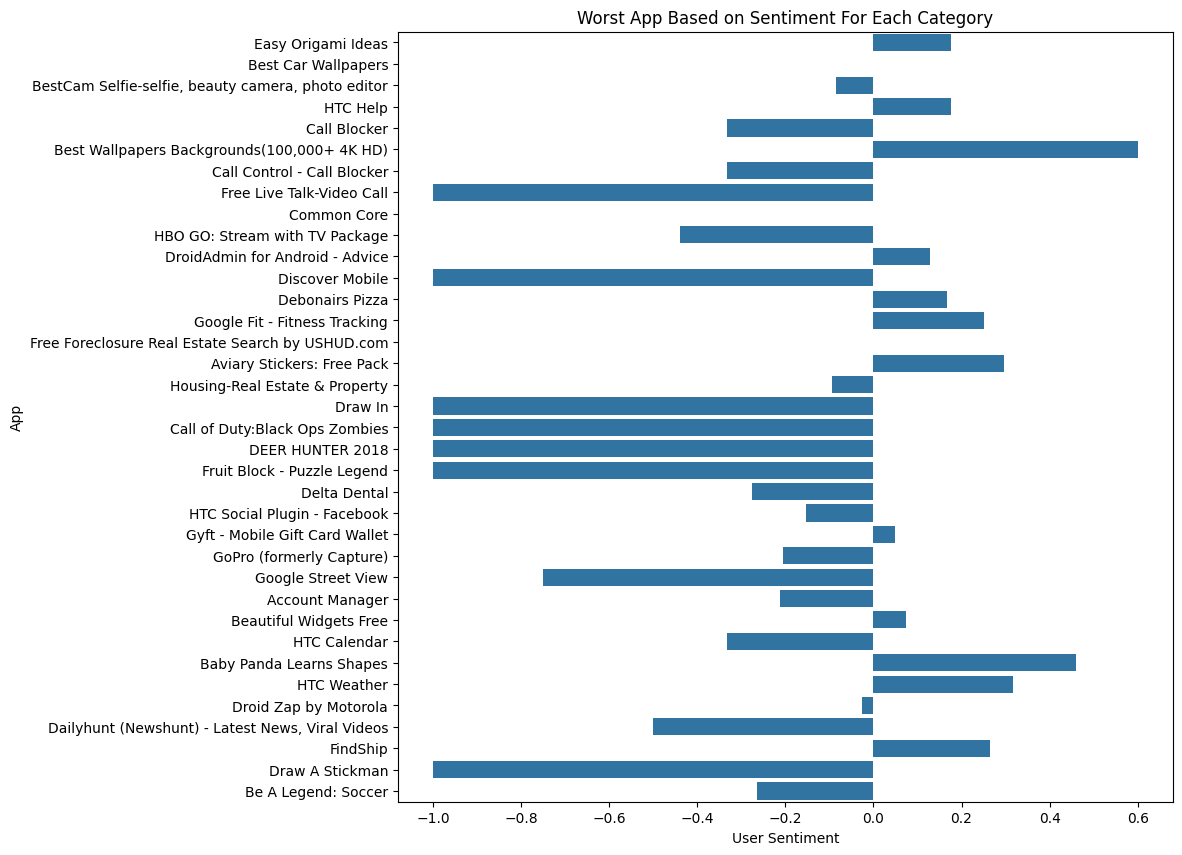

In [34]:
min_values = combined_google.groupby("Category")["Avg Sen/App"].transform("min")

worst_performance_per_category = combined_google[combined_google["Avg Sen/App"] == min_values]

plt.figure(figsize=(10,10))
sns.barplot(x="Avg Sen/App", y="App", data=worst_performance_per_category)
plt.xlabel("User Sentiment")
plt.title("Worst App Based on Sentiment For Each Category")

Text(0.5, 1.0, 'Relationship between User Sentitment and User Rating')

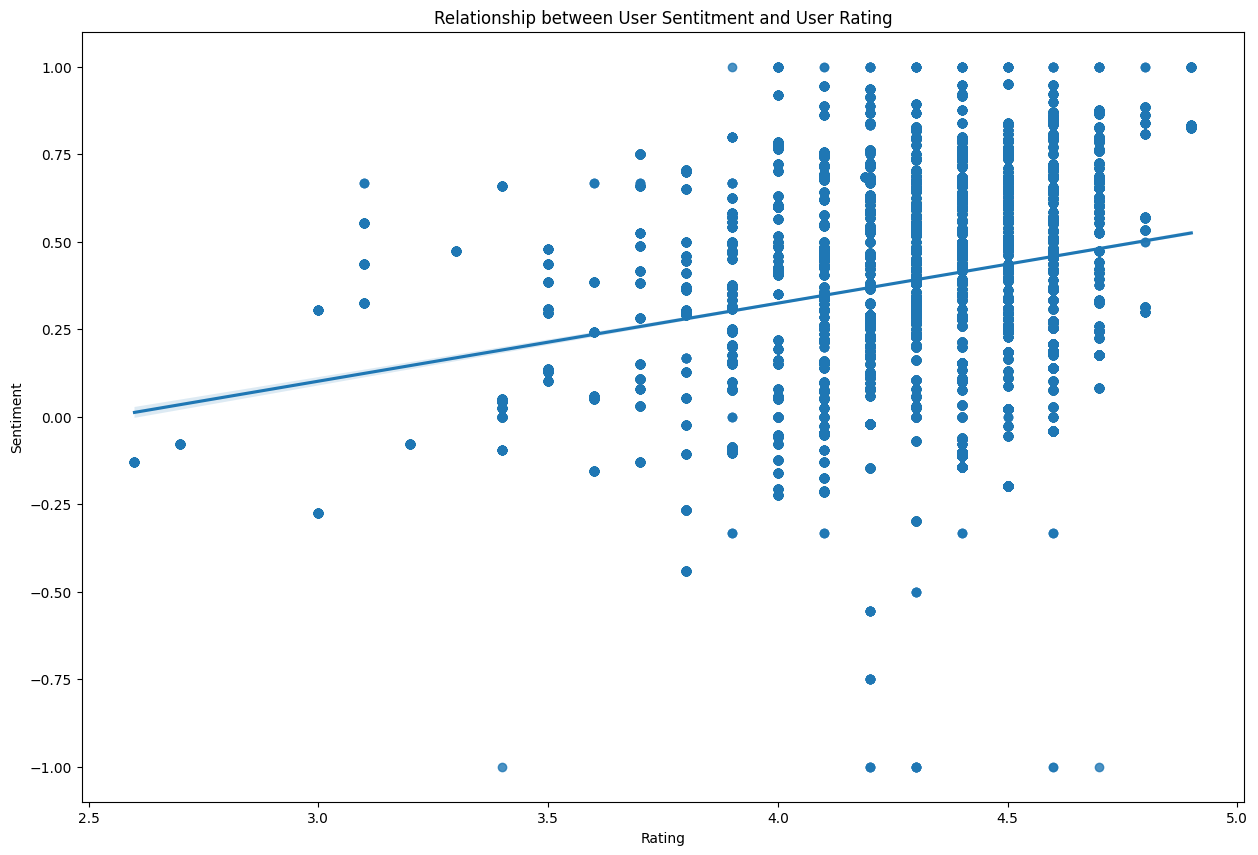

In [35]:
plt.figure(figsize=(15,10))

sns.regplot(data=combined_google, x="Rating", y="Avg Sen/App")
plt.ylabel("Sentiment")
plt.title("Relationship between User Sentitment and User Rating")

The above regression plot shows a surprisingly weak correlation between Rating and User Sentiment since one would expect an App have good rating would also receive positive reviews from users. 

# Conclusion
Throughout this report, we have analysed datasets of the Google Play Store, exploring app metrics and user reviews to uncover valuable insights. We started by loading and cleaning both datasets ensuring a robust foundation for analysis. We then visualised all the relevant relationships revealing trends in app popularity and user engagement.

Key findings from our analysis include:
- A positive correlation between the number of reviews and installs, suggesting that higher user engagement is associated with greater app visibility and popularity.
- User sentiment, it's impact on user rating is less significant than expected it's possibly due to outliers or other factors such as artificially inflated rating, it's a topic for further investigation. 
- The app category plays a crucial role in determining an app’s performance, categories such as Games, Family and Medical are very competitive there many Apps fighting the same demographic of consumers and they have the worst user sentiment, whereas categories like Auto and Vehicles and Comics are the least competitive and they have the best user sentiment.
